<a href="https://colab.research.google.com/github/siddharth40/Indian-herbal-site-1-/blob/main/MajorProject1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/my_drive')
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

Mounted at /content/my_drive


In [2]:
#data preprocessing
data_dir = '/content/my_drive/MyDrive/indian common herbal images'

# Use ImageDataGenerator to load the images from folders
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # Set as validation data


Found 963 images belonging to 11 classes.
Found 234 images belonging to 11 classes.


In [3]:
layers.Dense(11, activation='softmax')  # Change from 3 to 11


<Dense name=dense, built=False>

In [4]:
#cnn model
from keras import models, layers

# Define CNN model with 11 output classes
model = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(11, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # You can increase the number of epochs
    validation_data=validation_generator
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 605s 16s/step - accuracy: 0.1449 - loss: 2.8424 - val_accuracy: 0.3547 - val_loss: 1.9349
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 125s 4s/step - accuracy: 0.4129 - loss: 1.7900 - val_accuracy: 0.4615 - val_loss: 1.5441
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 125s 4s/step - accuracy: 0.6050 - loss: 1.2319 - val_accuracy: 0.5000 - val_loss: 1.5442
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.7053 - loss: 0.8379 - val_accuracy: 0.5342 - val_loss: 1.4704
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 148s 4s/step - accuracy: 0.7961 - loss: 0.6503 - val_accuracy: 0.5598 - val_loss: 1.3846
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 129s 4s/step - accuracy: 0.8757 - loss: 0.4520 - val_accuracy: 0.5256 - val_loss: 1.5066
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - accuracy: 0.8996 - loss: 0.3456 - val_accuracy: 0.5427 - val_loss: 1.9568
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 123s 4s/step - accuracy: 0.9416 - loss: 0.2085 - val_accuracy: 0.5641 - val_loss: 1

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('/content/drive/MyDrive/herbal_product_classifier.h5')


8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5691 - loss: 2.2346


Test accuracy: 0.5811966061592102


In [7]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = '/content/my_drive/MyDrive/indian common herbal images/Aloevera/100.jpg'  # Update with the selected image path
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array


array([[[176., 174., 179.],
        [164., 165., 170.],
        [131., 135., 144.],
        ...,
        [ 95.,  94.,  99.],
        [ 91.,  87.,  84.],
        [115., 115., 115.]],

       [[181., 190., 199.],
        [142., 148., 160.],
        [124., 126., 138.],
        ...,
        [123., 122., 128.],
        [144., 139., 143.],
        [ 86.,  80.,  80.]],

       [[176., 187., 193.],
        [145., 149., 160.],
        [160., 156., 170.],
        ...,
        [113., 113., 115.],
        [132., 128., 127.],
        [140., 134., 134.]],

       ...,

       [[150., 149., 157.],
        [165., 164., 169.],
        [136., 136., 136.],
        ...,
        [ 75.,  70.,  74.],
        [ 89.,  84.,  88.],
        [ 55.,  56.,  61.]],

       [[157., 159., 171.],
        [167., 169., 181.],
        [139., 141., 153.],
        ...,
        [ 66.,  62.,  63.],
        [ 89.,  85.,  86.],
        [ 85.,  83.,  88.]],

       [[132., 134., 146.],
        [165., 167., 179.],
        [128., 1

In [8]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img_path = '/content/my_drive/MyDrive/indian common herbal images/Aloevera/100.jpg'  # Update with the selected image path
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Scale the image

# Make prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
print(f'Predicted class: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Predicted class: [0]


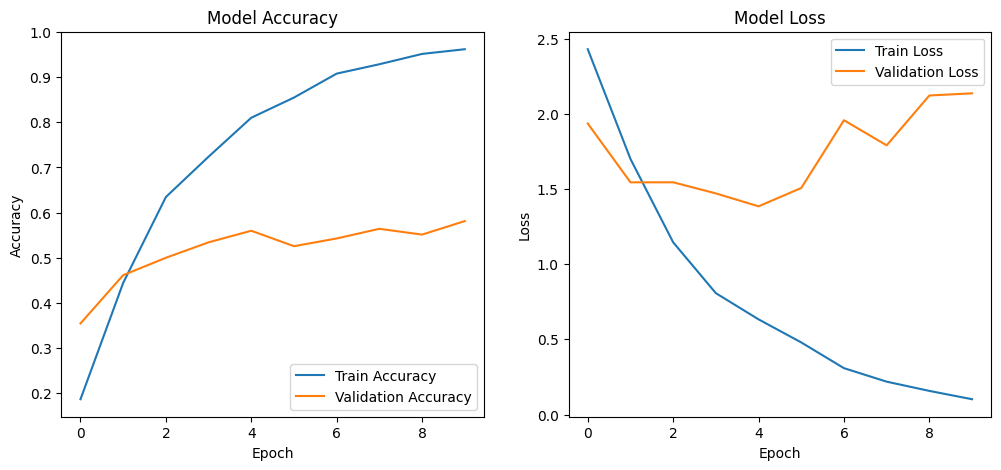

Final training accuracy: 96.16%
Final validation accuracy: 58.12%


In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()

# Print final accuracy percentage
print(f'Final training accuracy: {history.history["accuracy"][-1] * 100:.2f}%')
print(f'Final validation accuracy: {history.history["val_accuracy"][-1] * 100:.2f}%')


In [10]:
!pip install scikit-learn


In [11]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step


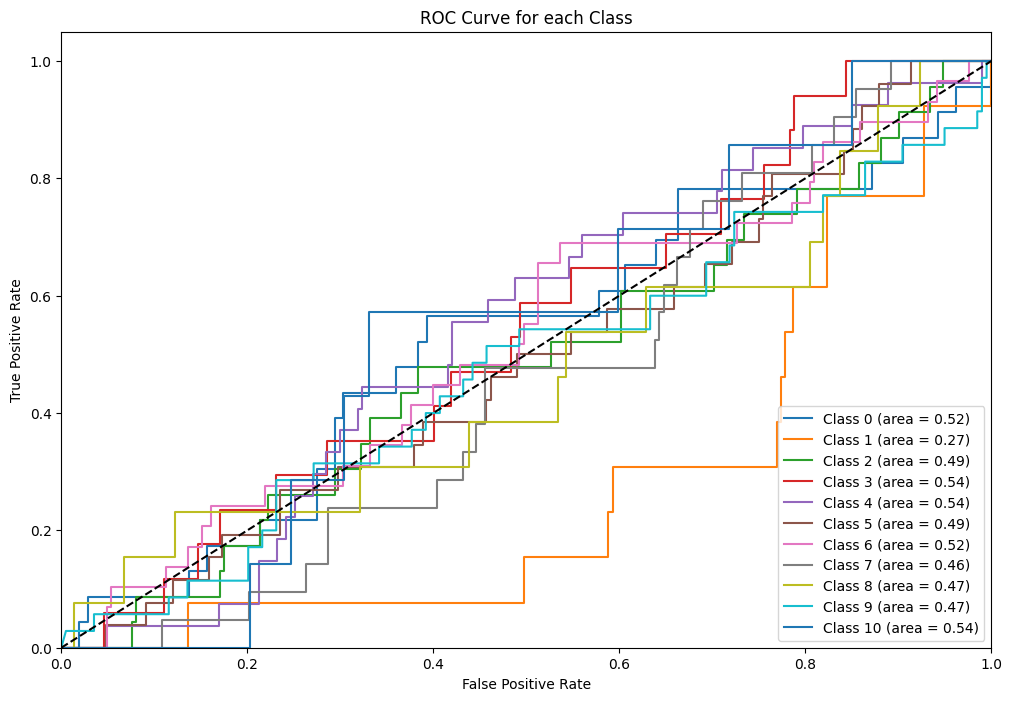

In [12]:
# Get the true labels and predicted probabilities
y_true = validation_generator.classes
y_pred_proba = model.predict(validation_generator)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(11):  # For each class (we have 11 classes)
    fpr[i], tpr[i], _ = roc_curve(y_true, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(12, 8))
for i in range(11):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each Class')
plt.legend(loc="lower right")
plt.show()


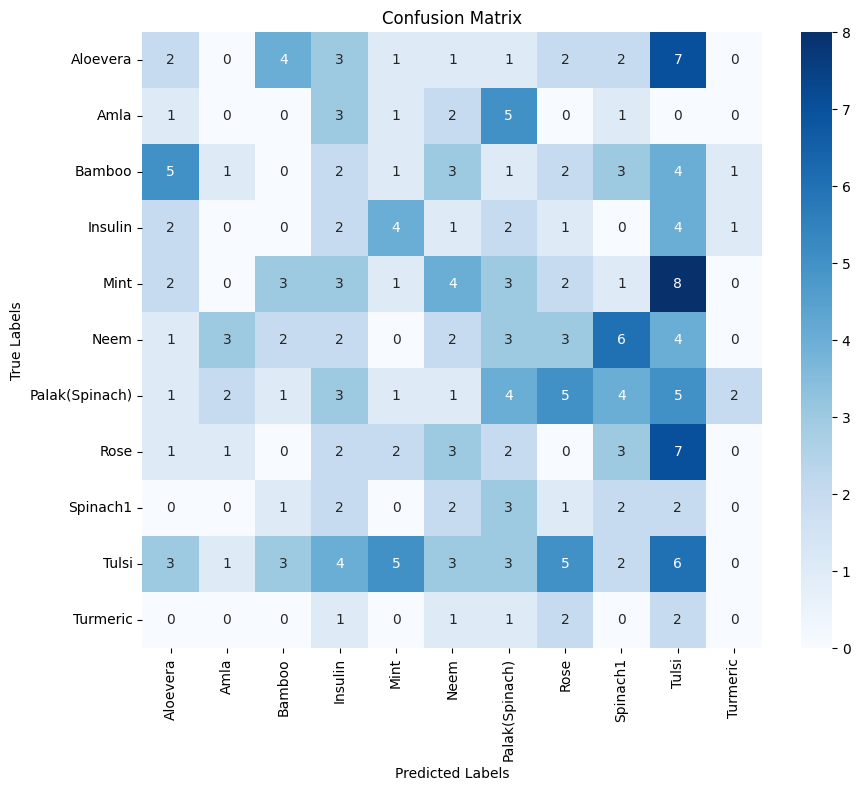

In [13]:
# Get predicted class labels
y_pred = np.argmax(y_pred_proba, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [14]:
# Classification Report
report = classification_report(y_true, y_pred, target_names=list(train_generator.class_indices.keys()))
print("Classification Report:\n", report)

# To show the classification report as a table, you can also convert it into a pandas dataframe:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support

# Get precision, recall, f1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred)

# Create DataFrame
result_table = pd.DataFrame({
    'Class': list(train_generator.class_indices.keys()),
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

# Display the table
print(result_table)


Classification Report:
                 precision    recall  f1-score   support

      Aloevera       0.11      0.09      0.10        23
          Amla       0.00      0.00      0.00        13
        Bamboo       0.00      0.00      0.00        23
       Insulin       0.07      0.12      0.09        17
          Mint       0.06      0.04      0.05        27
          Neem       0.09      0.08      0.08        26
Palak(Spinach)       0.14      0.14      0.14        29
          Rose       0.00      0.00      0.00        21
      Spinach1       0.08      0.15      0.11        13
         Tulsi       0.12      0.17      0.14        35
      Turmeric       0.00      0.00      0.00         7

      accuracy                           0.08       234
     macro avg       0.06      0.07      0.06       234
  weighted avg       0.07      0.08      0.08       234

             Class  Precision    Recall  F1-Score
0         Aloevera   0.111111  0.086957  0.097561
1             Amla   0.000000  0.